In [2]:
import pandas as pd
import sklearn
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
matplotlib.pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
df = pd.read_csv('testset.csv')
print(df.columns)
print(len(df))
# print(df.info())
# df.head()


Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')
100990


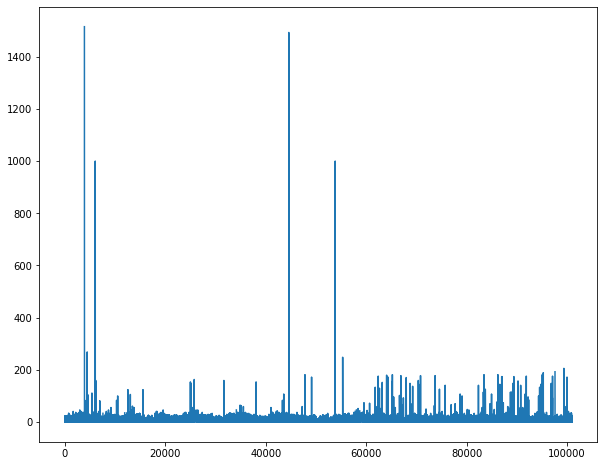

In [4]:
df[' _wspdm'].plot()

# New features

In [5]:
df['datetime'] = pd.to_datetime(df['datetime_utc']) 

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df['night']   = df.apply(lambda x: 1 if (x['datetime'].hour >= 20 and x['datetime'].hour < 24 ) or (x['datetime'].hour >= 0 and x['datetime'].hour < 5) else 0, axis=1)
df['morning'] = df.apply(lambda x: 1 if (x['datetime'].hour >= 5 and x['datetime'].hour < 10 ) else 0, axis=1)
df['noon']    = df.apply(lambda x: 1 if (x['datetime'].hour >= 10 and x['datetime'].hour < 16 ) else 0, axis=1)
df['evening'] = df.apply(lambda x: 1 if (x['datetime'].hour >= 16 and x['datetime'].hour < 20 ) else 0, axis=1)

# Filter

In [6]:
df_fil = df.copy()

df_fil = df_fil[df_fil['datetime'].dt.year.isin(range(2000, 2011))]

df_fil = df_fil[df_fil[' _tempm'] < 60]

In [7]:
filter_cols = [' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado']
#df_fil = df_fil[filter_cols]
df_fil[' _pressurem'] = df_fil[' _pressurem'].replace(-9999, np.nan)

In [8]:
df_fil.dropna(inplace=True, subset=filter_cols)

drop_cols = [' _heatindexm', ' _precipm' , ' _wdird', ' _wdire', ' _wgustm', ' _windchillm', 'datetime_utc']

df_fil = df_fil.drop(drop_cols, axis=1)

In [9]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60811 entries, 17670 to 79422
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0    _conds      60811 non-null  object        
 1    _dewptm     60811 non-null  float64       
 2    _fog        60811 non-null  int64         
 3    _hail       60811 non-null  int64         
 4    _hum        60811 non-null  float64       
 5    _pressurem  60811 non-null  float64       
 6    _rain       60811 non-null  int64         
 7    _snow       60811 non-null  int64         
 8    _tempm      60811 non-null  float64       
 9    _thunder    60811 non-null  int64         
 10   _tornado    60811 non-null  int64         
 11   _vism       58120 non-null  float64       
 12   _wspdm      59654 non-null  float64       
 13  datetime     60811 non-null  datetime64[ns]
 14  year         60811 non-null  int64         
 15  month        60811 non-null  int64         
 16  

In [10]:
df = df_fil

In [11]:
print([c for c in df_fil.columns if c not in drop_cols])

[' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wspdm', 'datetime', 'year', 'month', 'week', 'day', 'hour', 'night', 'morning', 'noon', 'evening']


# Remove outliers

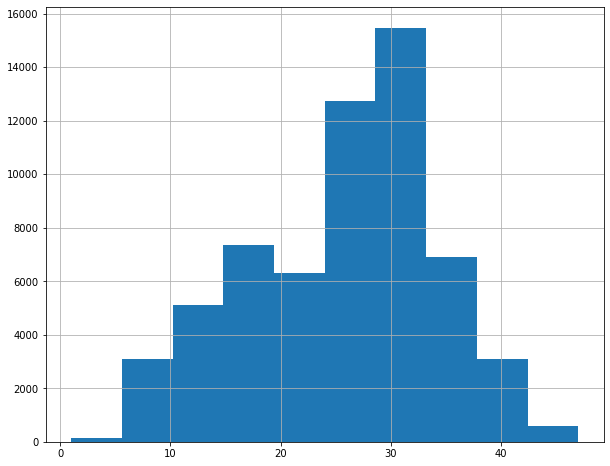

In [12]:
df[' _tempm'].hist()

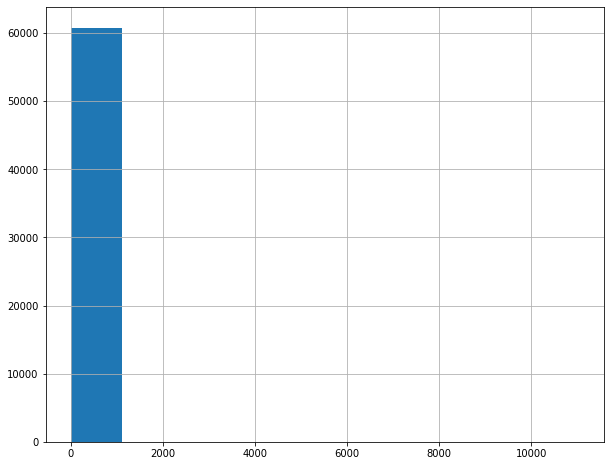

In [13]:
df[' _pressurem'].hist()

In [14]:
float_col = df.columns[df.dtypes.values == np.dtype(np.float)]

In [15]:
float_col

Index([' _dewptm', ' _hum', ' _pressurem', ' _tempm', ' _vism', ' _wspdm'], dtype='object')

In [16]:
df[float_col] = df[float_col].mask((df[float_col] - df[float_col].mean()).abs() > 3 * df[float_col].std())

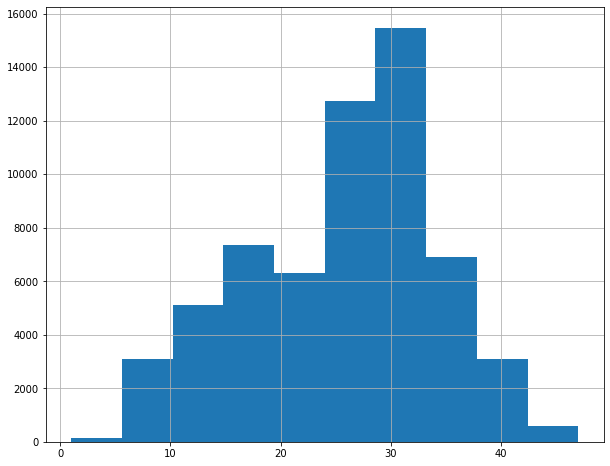

In [17]:
df[' _tempm'].hist()

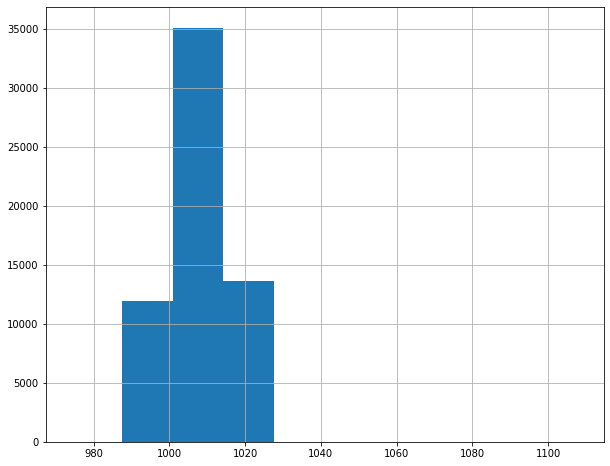

In [18]:
df[' _pressurem'].hist()

In [19]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,datetime,year,month,week,day,hour,night,morning,noon,evening
17670,Fog,7.0,1,0,100.0,1017.0,0,0,7.0,0,0,NaN,0.0,2000-01-01 00:30:00,2000,1,52,1,0,1,0,0,0
17671,Fog,8.0,1,0,100.0,1017.0,0,0,8.0,0,0,NaN,0.0,2000-01-01 01:30:00,2000,1,52,1,1,1,0,0,0
17672,Fog,9.0,1,0,100.0,1018.0,0,0,9.0,0,0,NaN,0.0,2000-01-01 02:30:00,2000,1,52,1,2,1,0,0,0
17673,Fog,8.0,1,0,93.0,1019.0,0,0,9.0,0,0,NaN,0.0,2000-01-01 03:30:00,2000,1,52,1,3,1,0,0,0
17674,Fog,10.0,1,0,100.0,1020.0,0,0,10.0,0,0,NaN,0.0,2000-01-01 04:30:00,2000,1,52,1,4,1,0,0,0


# Missing Data

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem',
       ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism',
       ' _wspdm', 'datetime', 'year', 'month', 'week', 'day', 'hour', 'night',
       'morning', 'noon', 'evening'],
      dtype='object')


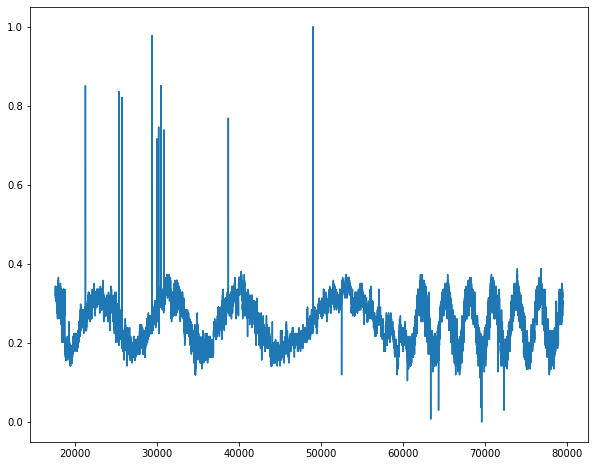

In [31]:
dfays = df[(df['year']>=2000) & (df['year']<=2010)]
print(dfays.columns)
dfays.interpolate(inplace=True)
dfays[' _pressurem'].plot()

In [32]:
dfays.at[list(range(17670, 17676)), ' _vism'] = [0.322, 0.322, 0.322, 0.322, 0.322,0.222]

In [33]:
df = dfays

# Normalization

In [34]:
scaler= MinMaxScaler()

In [35]:
con_col = df.columns[df.dtypes.values == np.dtype(np.float)]
con_col = con_col.drop(' _tempm')
print(con_col)

Index([' _dewptm', ' _hum', ' _pressurem', ' _vism', ' _wspdm'], dtype='object')


In [36]:
df[con_col] = scaler.fit_transform(df[con_col])

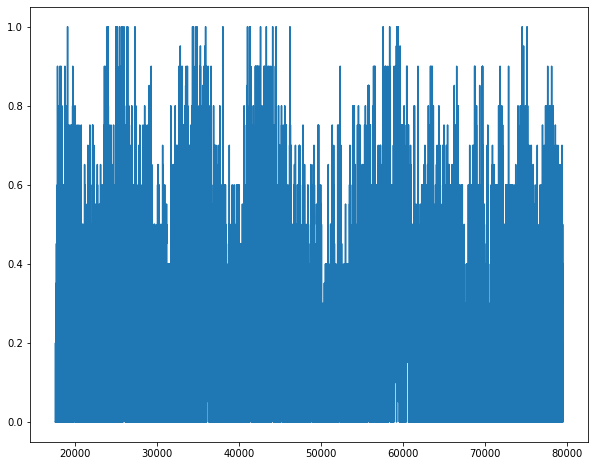

In [37]:
df[' _wspdm'].plot()

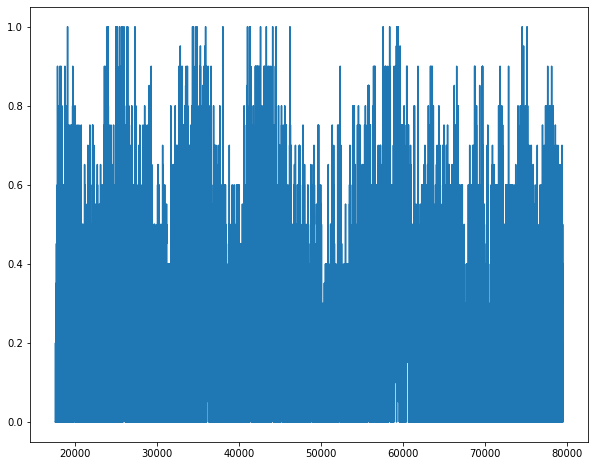

In [38]:
df[' _wspdm'].plot()

In [39]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,datetime,year,month,week,day,hour,night,morning,noon,evening
17670,Fog,0.317073,1,0,1.000000,0.320896,0,0,7.0,0,0,0.322,0.0,2000-01-01 00:30:00,2000,1,52,1,0,1,0,0,0
17671,Fog,0.341463,1,0,1.000000,0.320896,0,0,8.0,0,0,0.322,0.0,2000-01-01 01:30:00,2000,1,52,1,1,1,0,0,0
17672,Fog,0.365854,1,0,1.000000,0.328358,0,0,9.0,0,0,0.322,0.0,2000-01-01 02:30:00,2000,1,52,1,2,1,0,0,0
17673,Fog,0.341463,1,0,0.927083,0.335821,0,0,9.0,0,0,0.322,0.0,2000-01-01 03:30:00,2000,1,52,1,3,1,0,0,0
17674,Fog,0.390244,1,0,1.000000,0.343284,0,0,10.0,0,0,0.322,0.0,2000-01-01 04:30:00,2000,1,52,1,4,1,0,0,0


# For each day part, get mean row

In [175]:
#df.groupby(['night', 'morning', 'noon', 'evening']).count().head()

df_night = df[df['night'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_morning = df[df['morning'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_noon = df[df['noon'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()
df_evening = df[df['evening'] == 1].groupby([df['datetime'].dt.date, ' _conds']).mean()

In [176]:
df_night = df_night.reset_index().drop_duplicates(['datetime', 'night'])
df_morning = df_morning.reset_index().drop_duplicates(subset=['datetime', 'morning'])
df_noon = df_noon.reset_index().drop_duplicates(subset=['datetime', 'noon'])
df_evening = df_evening.reset_index().drop_duplicates(subset=['datetime', 'evening'])

In [177]:
#df_night.drop(['index'], axis=1)
df_night

,datetime,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,year,month,week,day,hour,night,morning,noon,evening
0,2000-01-01,Fog,0.368564,1.0,0.0,0.964120,0.325871,0.0,0.0,9.666667,0.0,0.0,0.181152,0.000000,2000.0,1.0,52.0,1.0,10.666667,1.0,0.0,0.0,0.0
1,2000-01-02,Fog,0.365854,1.0,0.0,0.857143,0.319829,0.0,0.0,11.285714,0.0,0.0,0.006667,0.093050,2000.0,1.0,52.0,2.0,12.714286,1.0,0.0,0.0,0.0
3,2000-01-03,Fog,0.327913,1.0,0.0,0.893519,0.316750,0.0,0.0,9.111111,0.0,0.0,0.005976,0.089189,2000.0,1.0,1.0,3.0,10.666667,1.0,0.0,0.0,0.0
4,2000-01-04,Fog,0.341463,1.0,0.0,0.923611,0.315920,0.0,0.0,9.222222,0.0,0.0,0.003182,0.050450,2000.0,1.0,1.0,4.0,10.666667,1.0,0.0,0.0,0.0
5,2000-01-05,Fog,0.320122,1.0,0.0,0.955729,0.321828,0.0,0.0,7.750000,0.0,0.0,0.006364,0.087838,2000.0,1.0,1.0,5.0,9.125000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,2010-12-27,Heavy Fog,0.341463,1.0,0.0,0.979167,0.313433,0.0,0.0,8.000000,0.0,0.0,0.000333,0.100000,2010.0,12.0,52.0,27.0,0.000000,1.0,0.0,0.0,0.0
6877,2010-12-28,Partial Fog,0.390244,1.0,0.0,0.880208,0.320896,0.0,0.0,11.500000,0.0,0.0,0.005833,0.000000,2010.0,12.0,52.0,28.0,12.000000,1.0,0.0,0.0,0.0
6879,2010-12-29,Heavy Fog,0.463415,1.0,0.0,0.958333,0.291045,0.0,0.0,14.000000,0.0,0.0,0.000833,0.000000,2010.0,12.0,52.0,29.0,21.000000,1.0,0.0,0.0,0.0
6881,2010-12-30,Heavy Fog,0.487805,1.0,0.0,0.989583,0.291045,0.0,0.0,14.000000,0.0,0.0,0.003333,0.100000,2010.0,12.0,52.0,30.0,0.000000,1.0,0.0,0.0,0.0


In [178]:
d = pd.concat([df_night, df_morning, df_noon, df_evening])
# d = d.sort_values(['datetime', 'night', 'morning', 'noon', 'evening'], ascending=False).reset_index()
d = d.sort_values(['datetime', 'night', 'morning', 'noon', 'evening'], ascending=[True] + [False]*4)#.sort_values(['night', 'morning', 'noon', 'evening'], ascending=False).reset_index(drop=True)
#d.drop(['index'], axis=1)

In [179]:
d

,datetime,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm,year,month,week,day,hour,night,morning,noon,evening
0,2000-01-01,Fog,0.368564,1.0,0.0,0.964120,0.325871,0.0,0.0,9.666667,0.0,0.0,0.181152,0.00000,2000.0,1.0,52.0,1.0,10.666667,1.0,0.0,0.0,0.0
0,2000-01-01,Fog,0.439024,1.0,0.0,0.906250,0.335821,0.0,0.0,13.500000,0.0,0.0,0.114333,0.00000,2000.0,1.0,52.0,1.0,5.500000,0.0,1.0,0.0,0.0
0,2000-01-01,Fog,0.451220,1.0,0.0,0.937500,0.320896,0.0,0.0,13.500000,0.0,0.0,0.006389,0.00000,2000.0,1.0,52.0,1.0,14.500000,0.0,0.0,1.0,0.0
0,2000-01-01,Fog,0.420732,1.0,0.0,0.984375,0.324627,0.0,0.0,11.500000,0.0,0.0,0.005833,0.00000,2000.0,1.0,52.0,1.0,17.500000,0.0,0.0,0.0,1.0
1,2000-01-02,Fog,0.365854,1.0,0.0,0.857143,0.319829,0.0,0.0,11.285714,0.0,0.0,0.006667,0.09305,2000.0,1.0,52.0,2.0,12.714286,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,2010-12-30,Light Rain,0.487805,0.0,0.0,0.937500,0.283582,1.0,0.0,14.000000,0.0,0.0,0.008333,0.00000,2010.0,12.0,52.0,30.0,18.000000,0.0,0.0,0.0,1.0
6884,2010-12-31,Patches of Fog,0.390244,1.0,0.0,0.895833,0.294776,0.0,0.0,11.000000,0.0,0.0,0.008333,0.20000,2010.0,12.0,52.0,31.0,10.500000,1.0,0.0,0.0,0.0
5301,2010-12-31,Haze,0.414634,0.0,0.0,0.666667,0.305970,0.0,0.0,15.000000,0.0,0.0,0.016667,0.30000,2010.0,12.0,52.0,31.0,6.000000,0.0,1.0,0.0,0.0
5776,2010-12-31,Haze,0.414634,0.0,0.0,0.781250,0.283582,0.0,0.0,13.000000,0.0,0.0,0.016667,0.40000,2010.0,12.0,52.0,31.0,12.000000,0.0,0.0,1.0,0.0


In [180]:
def label(df):
    df.loc[df[' _tempm']<10, 'Temp'] = 0
    for i in range(10):
        df.loc[(10 + i*3 <= df[' _tempm']) & (df[' _tempm'] < 13 + 3*i), 'Temp'] = i + 1
    df.loc[(40 <= df[' _tempm']), 'Temp'] = i + 1
    return df

df_night = label(df_night)
df_morning = label(df_morning)
df_noon = label(df_noon)
df_evening = label(df_evening)
d = label(d)

In [181]:
def train_test(df):
    return df[df['year']<2010], df[df['year']==2010]

df_train, df_test = train_test(d)
df_night_train, df_night_test = train_test(df_night)
df_morning_train, df_morning_test = train_test(df_morning)
df_noon_train, df_noon_test = train_test(df_noon)
df_evening_train, df_evening_test = train_test(df_evening)

In [182]:
for dff, n in [(df_train, 'weather_data/df_full{}.csv'), 
             (df_night_train, 'weather_data/df_night{}.csv'), 
             (df_morning_train, 'weather_data/df_morning{}.csv'), 
             (df_noon_train, 'weather_data/df_noon{}.csv'), 
             (df_evening_train, 'weather_data/df_evening{}.csv')]:
    dff.to_csv(n.format('_train'))
    

for dff, n in [(df_test, 'weather_data/df_full{}.csv'), 
             (df_night_test, 'weather_data/df_night{}.csv'), 
             (df_morning_test, 'weather_data/df_morning{}.csv'), 
             (df_noon_test, 'weather_data/df_noon{}.csv'), 
             (df_evening_test, 'weather_data/df_evening{}.csv')]:
    dff.to_csv(n.format('_test'))